In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew ,kurtosis,norm
import numpy as np
import statistics as st

In [2]:
df = pd.read_csv('DS1_C8_Computers_Data_Project.csv')
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [3]:
df.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [4]:
Num_col = df.select_dtypes(exclude='object')
Num_col

,index,price,speed,hd,ram,screen,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,94,94,1
1,2,1795,33,85,2,14,94,94,1
2,3,1595,25,170,4,15,94,94,1
3,4,1849,25,170,8,14,94,94,1
4,5,3295,33,340,16,14,94,104,1
...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,39,70,35
6255,6256,2223,66,850,16,15,39,70,35
6256,6257,2654,100,1200,24,15,39,70,35
6257,6258,2195,100,850,16,15,39,70,35


In [5]:
data=[]
for col in Num_col:
    lo=[]
    uo=[]
    column_df=pd.Series(Num_col[col])
    Maximum=max(column_df)
    Minimum=min(column_df)
    Range=Maximum-Minimum
    Q1=column_df.quantile(0.25)
    Q2=column_df.quantile(0.50)
    Q3=column_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in Num_col[col]:
        if z>UF:
            uo.append(z)
        elif z<LF:
            lo.append(z)
    data.append((col,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,[[lo,uo]]))
columns_data=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
pd_data=pd.DataFrame(data,columns=columns_data)
pd_data

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,index,6259,1,6258,1565.5,3130.0,4694.5,3129.0,9388.00,-3128.00,"[[[], []]]"
1,price,5399,949,4450,1794.0,2144.0,2595.0,801.0,3796.50,592.50,"[[[], [4395, 4195, 3995, 3895, 3990, 4020, 389..."
2,speed,100,25,75,33.0,50.0,66.0,33.0,115.50,-16.50,"[[[], []]]"
3,hd,2100,80,2020,214.0,340.0,528.0,314.0,999.00,-257.00,"[[[], [1000, 1000, 1370, 1370, 1100, 1100, 110..."
4,ram,32,2,30,4.0,8.0,8.0,4.0,14.00,-2.00,"[[[], [16, 16, 16, 16, 16, 16, 16, 16, 16, 16,..."
5,screen,17,14,3,14.0,14.0,15.0,1.0,16.50,12.50,"[[[], [17, 17, 17, 17, 17, 17, 17, 17, 17, 17,..."
6,ads_2022,339,39,300,162.5,246.0,275.0,112.5,443.75,-6.25,"[[[], []]]"
7,ads_2023,339,39,300,162.0,246.0,283.0,121.0,464.50,-19.50,"[[[], []]]"
8,trend,35,1,34,10.0,16.0,21.5,11.5,38.75,-7.25,"[[[], []]]"


# BUSINESS OBJECTIVE-3

# task-3(a)

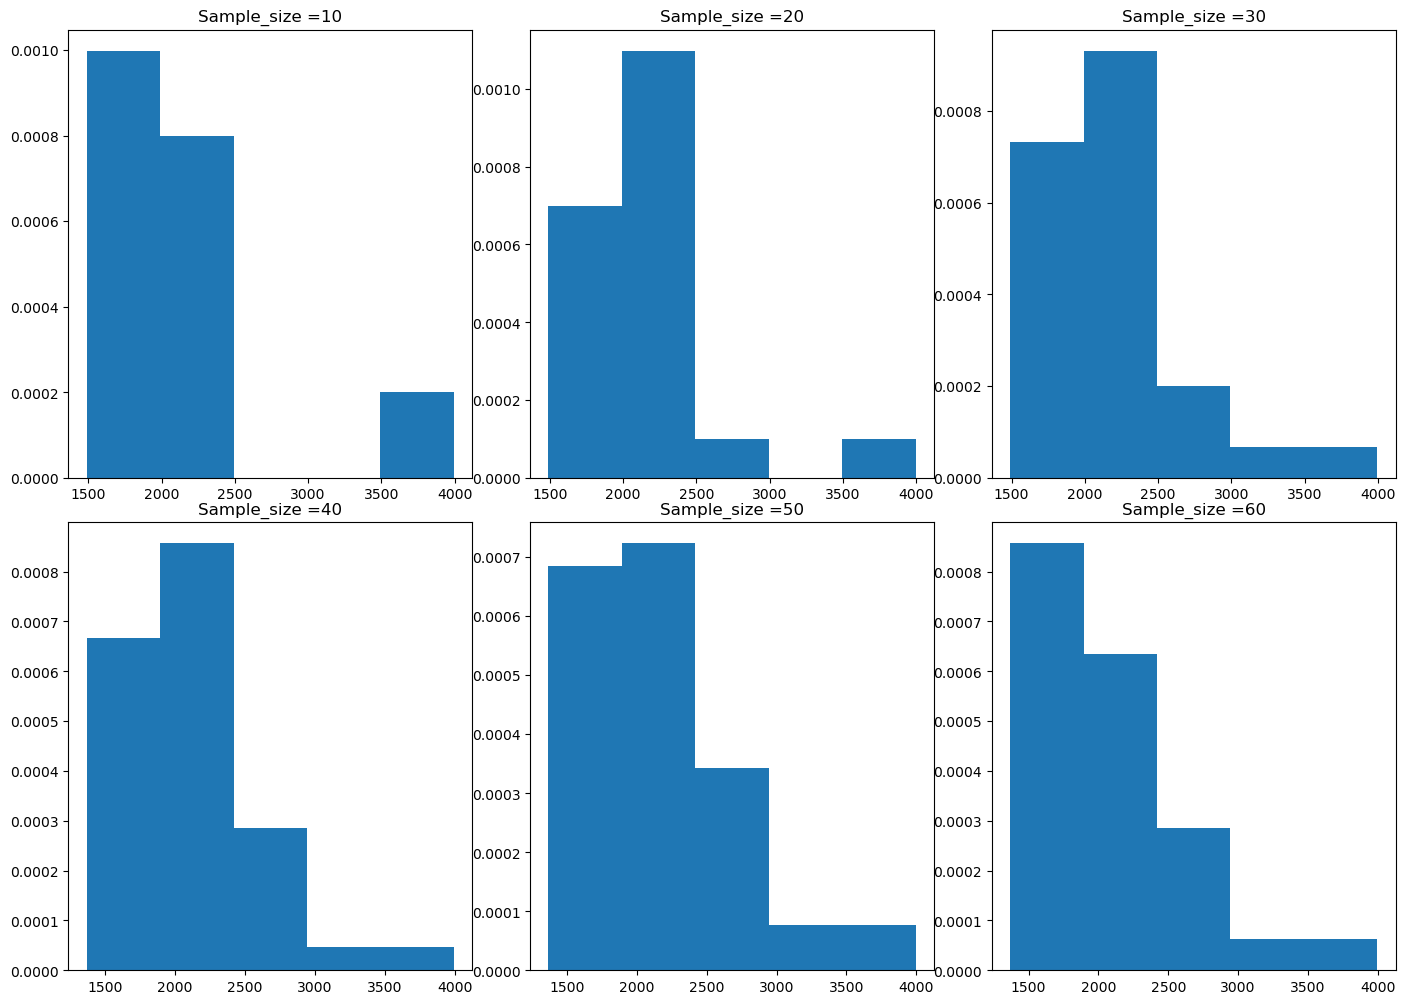

In [6]:
num = [10,20,30,40,50,60]
data_s = []
fig,ax = plt.subplots(2,3, figsize = (14,10))
plt.tight_layout()
for i in num:
    sample_df = df.sample(n=i, replace = True, random_state=1)
    data_s.append(sample_df["price"])
k=0
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].hist(data_s[k],5,density = True)
        ax[i,j].set_title(label='Sample_size =' +str(len(data_s[k])))
        k=k+1
plt.show()

In [11]:
sample_10=price.sample(n=10,replace=True,random_state=1)
sample_20=price.sample(n=20,replace=True,random_state=1)
sample_30=price.sample(n=30,random_state=1,replace=True)
sample_40=price.sample(n=40,random_state=1,replace=True)
sample_50=price.sample(n=50,replace=True,random_state=1)
sample_60=price.sample(n=60,replace=True,random_state=1)
sample_10_mean=st.mean(sample_10["price"])
print("The mean value for the sample 10 is:",sample_10_mean) 
sample_20_mean=st.mean(sample_20["price"])
print("The mean value for the sample 20  is:",sample_20_mean)
sample_30_mean=st.mean(sample_30["price"])
print("The mean value for the sample 30 is:",sample_30_mean)
sample_40_mean=st.mean(sample_40["price"])
print("The mean value for the sample 40 is:",sample_40_mean)
sample_50_mean=st.mean(sample_50["price"])
print("The mean value for the sample 50 is:",sample_50_mean)
sample_60_mean=st.mean(sample_60["price"])
print("The mean value for the sample 60 is:",sample_60_mean)

The mean value for the sample 10 is: 2126.7
The mean value for the sample 20  is: 2145.35
The mean value for the sample 30 is: 2169.766666666667
The mean value for the sample 40 is: 2122.65
The mean value for the sample 50 is: 2172.2
The mean value for the sample 60 is: 2092.5666666666666


# task-3(b)

Yes, the distribution of sample means approximates a normal distribution as the sample size increases, due to the Central Limit Theorem.

# task-3(c)


In [12]:
sample_data=pd.DataFrame()
for i in range(0,20):
    sample_data["Sample"+str(i)]=df["price"].sample(n=40,replace=True).reset_index(drop=True)
sample_data

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16,Sample17,Sample18,Sample19
0,2090,2223,2295,2395,2024,2204,2794,1899,1568,1590,2723,3344,1773,2049,2375,1604,2425,1599,2395,2225
1,2395,2405,3365,2595,2395,2423,2390,1149,1999,2799,2745,2299,2490,2644,3390,4348,1604,3045,2044,1940
2,2399,1554,2268,2225,2195,2078,1795,1399,2290,2195,1499,3299,1299,2554,2249,1899,1499,4292,1759,2095
3,3699,1299,1825,1824,1844,2090,2044,1794,3090,1459,2644,2199,2423,1899,2594,1795,2999,1819,1895,1944
4,1395,2290,1199,2294,2994,1969,3440,2055,1868,2390,3190,1895,2898,1666,1929,1939,3490,1644,2699,1799
5,2999,2295,1899,2019,1590,2643,2295,2745,2040,1699,3334,2195,2225,1890,2125,1554,2299,2190,1775,1799
6,1899,1268,1495,3004,2198,1799,1399,1544,2195,2590,1898,1718,1744,1854,1595,2344,1590,2390,1395,1395
7,2875,1449,1828,1899,2643,1995,2090,2594,1249,2395,1775,3599,1745,2244,1644,2784,2145,1845,3090,1865
8,2118,1488,3244,1939,1769,1779,1445,1599,1899,1490,2244,2595,2720,2995,2799,2290,2695,2495,1575,2599
9,1695,1499,1998,1790,1999,2099,2769,2490,1969,1748,1475,2609,1609,2124,2095,1995,2494,2075,2099,2744


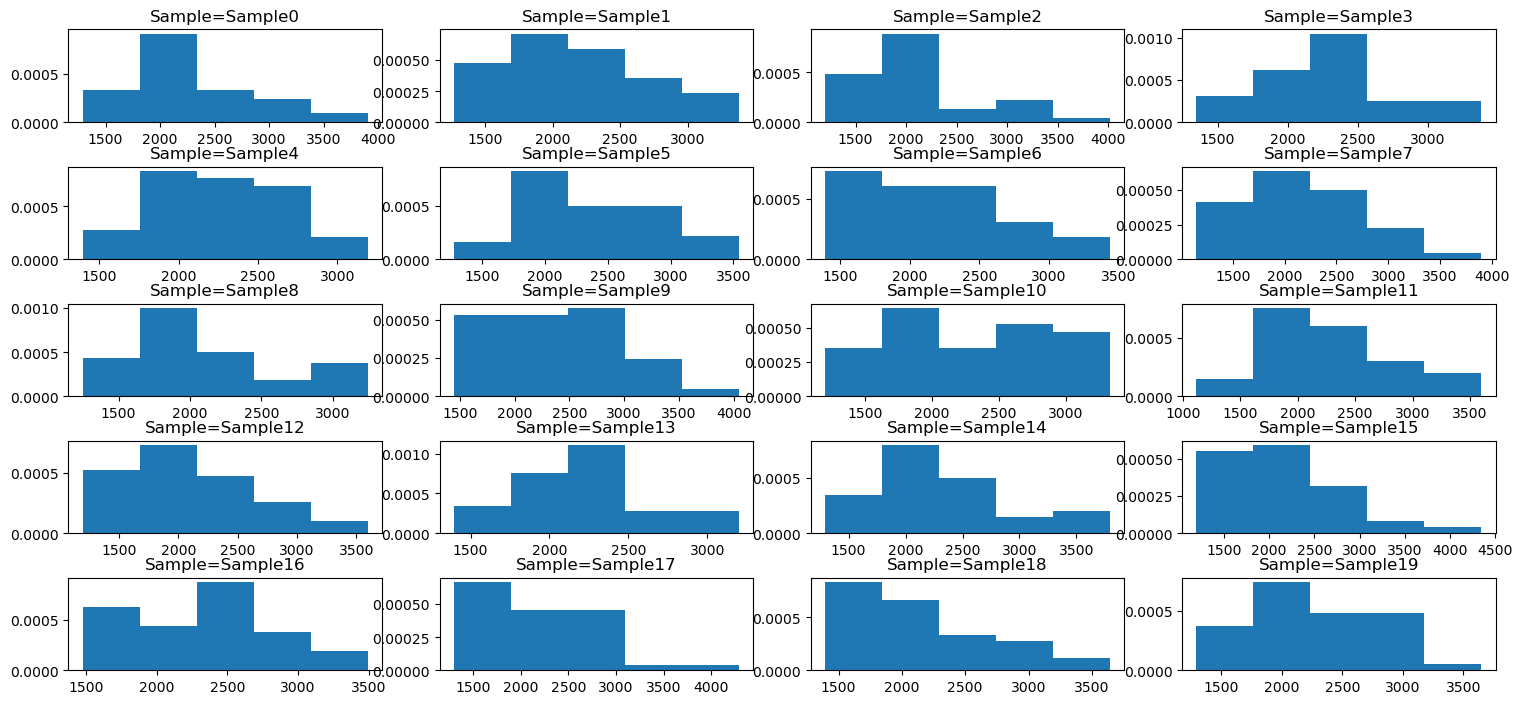

In [13]:
sample_namess=sample_data.columns
fig,ax=plt.subplots(5,4,figsize=(15,7))
k=0
plt.tight_layout()
for i in range(0,5):
    for j in range(0,4):
        ax[i,j].hist(sample_data[sample_namess[k]],bins=5,density=True)
        ax[i,j].set_title(label="Sample="+str(sample_namess[k]))
        k=k+1
plt.show()

In [14]:
p_mean=st.mean(price["price"])
print("The population mean for the price:",p_mean)
p_median=st.median(price["price"])
print("The population median for the price:",p_median)
p_std=st.stdev(price["price"])
print("The population standard deviation for the price is:",p_std)
p_skew=skew(price["price"],bias=True)
print("The skewness for the price is:",p_skew)
p_kurtosis=kurtosis(price["price"],bias=True)
print("The population kurtosis for the price is:",p_kurtosis)

The population mean for the price: 2219.576609682058
The population median for the price: 2144
The population standard deviation for the price is: 580.8039556527063
The skewness for the price is: 0.7115541683835676
The population kurtosis for the price is: 0.7288752074124178


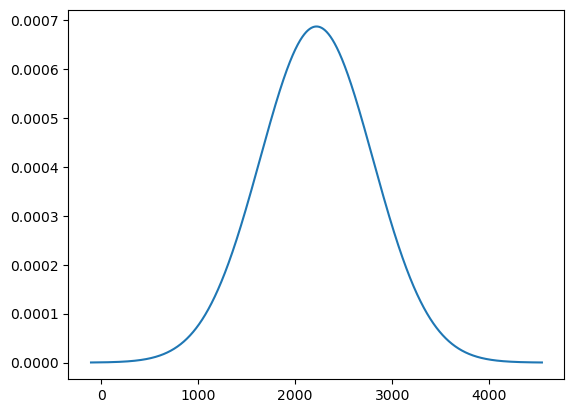

In [15]:
lower_p=p_mean-4*p_std
upper_p=p_mean+4*p_std
Arr=np.arange(lower_p,upper_p)
plt.plot(Arr,norm.pdf(Arr,p_mean,p_std))

In [16]:
sample_100 = df.sample(n=100,replace=True,random_state=1)
sample_100

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
5157,5158,1758,50,545,4,17,yes,no,yes,182,182,24
235,236,2295,66,130,4,14,no,no,yes,100,100,3
3980,3981,2095,66,426,8,14,yes,no,yes,273,273,18
5192,5193,1528,33,428,4,17,no,no,yes,182,182,24
905,906,1899,25,120,4,14,no,no,no,249,249,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,1744,33,107,2,14,no,no,yes,259,259,11
1795,1796,1644,25,107,2,14,no,no,yes,259,259,11
2944,2945,2645,66,424,8,17,yes,no,yes,267,267,15
5373,5374,2339,33,212,8,17,yes,yes,yes,158,158,25


In [17]:
sample_100_mean=st.mean(sample_100["price"])
print("The sample mean for the price is:",sample_100_mean)
sample_100_std=st.stdev(sample_100["price"])
print("The sample standard deviation for the price is:",sample_100_std)
sample_100_skew=skew(sample_100["price"])
print("The sample skew for the price is:",sample_100_skew)
sample_100_kurtosis=kurtosis(sample_100["price"])
print("The sample kurtosis for the price is:",sample_100_kurtosis)

The sample mean for the price is: 2181.61
The sample standard deviation for the price is: 570.175126295829
The sample skew for the price is: 0.9263107653468952
The sample kurtosis for the price is: 0.7879175552511528


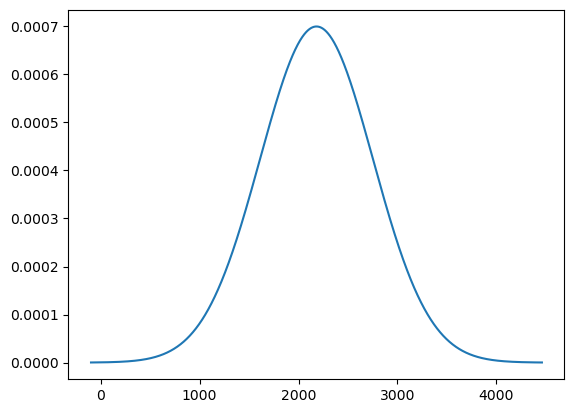

In [18]:
lower_s=sample_100_mean-4 * sample_100_std
upper_s=sample_100_mean+4 * sample_100_std
arr_s =np.arange(lower_s,upper_s)
plt.plot(arr_s,norm.pdf(arr_s,sample_100_mean,sample_100_std))

# Interpretation:
The population mean for the price is 2219.58,and the sample mean for the price is 2181.61.
Given the sample size of 𝑛=100, which is sufficiently large, the sampling distribution of the sample mean should 
approximate a normal distribution according to the Central Limit Theorem.
The small difference between the sample mean and population mean (2219.58− 2181.61=37.97 is within an acceptable range of sampling variability.
This indicates that the sample data adheres to the conditions of the Central Limit Theorem, 
and the sample mean is a reliable estimator of the population mean.

 We found that calculated samples mean std is near around sample std calculated using population std as sample size increases the std of the samples becomes smaller and smaller because the population std is being divided larger and larger values of sqrt(n)
sample distrubution curve is tending  to the Normal Distrubution curve irrespective the type of Population distrubution
When the sample size is greater than 30
Sample mean is near around the population mean
the std of the sample mean is the standard deviation of the population divided by the sqrt of the sample size.
Above Properties are known as CLT Of any Samplimg Distrubution
Using central limit theorem we can justify a sample data to properly Representation of Population Data

# BUSINESS OBJECTIVE-2

# task-2(a)

In [19]:
import statistics as st
import warnings
warnings.filterwarnings('ignore')

In [20]:
p_mean=st.mean(df["price"])
print("The population mean for the price:",p_mean)

The population mean for the price: 2219.576609682058


# task-2(b)

In [21]:
price=df[["price"]]
price

,price
0,1499
1,1795
2,1595
3,1849
4,3295
...,...
6254,1690
6255,2223
6256,2654
6257,2195


In [22]:
# Simple Random Sampling With Replacement
sample_price_5=price.sample(n=5,replace=True,random_state=1)
sample_price_5

,price
5157,1758
235,2295
3980,2095
5192,1528
905,1899


In [23]:
print("The average price for sampling with replacement technique is:",st.mean(sample_price_5["price"]))

The average price for sampling with replacement technique is: 1915


In [24]:
# Simple Random Sampling Without Replacement
Sample_price_5_wr=price.sample(n=5,random_state=1)
Sample_price_5_wr
print("The average price for sampling without replacement technique is:",st.mean(Sample_price_5_wr["price"]))

The average price for sampling without replacement technique is: 3014.8


In [25]:
# Stratified Sampling
grouped_df = df.groupby(['premium'])
data = df.premium.unique()
strat_sample_df = []

for d in data:
    d_data = grouped_df.get_group(d)
    #print(d_data)
    sample_data = d_data.sample(n=5,replace=True, random_state = 1)
    #print(sample_data)
    strat_sample_df.append(sample_data)
str_sample=pd.concat(strat_sample_df)
str_sample

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
5750,5751,2204,50,850,16,15,yes,no,yes,132,132,28
241,242,1895,25,130,4,14,no,no,yes,100,100,3
4521,4522,3440,66,1000,24,15,yes,no,yes,205,205,21
5785,5786,1445,66,340,8,14,no,no,yes,132,132,28
940,941,2045,33,250,8,15,no,no,yes,249,249,7
1015,1016,2109,33,120,4,14,no,no,no,298,298,8
2487,2488,2348,33,245,4,14,no,no,no,216,216,13
1422,1423,2094,33,120,4,14,yes,no,no,246,246,9
1952,1953,2674,33,245,8,14,yes,no,no,259,259,11
1881,1882,1818,25,212,4,14,no,no,no,259,259,11


In [26]:
strat_sample_mean = st.mean(str_sample['price'])
print("The average price for sample using stratified sampling is :",strat_sample_mean)

The average price for sample using stratified sampling is : 2207.2


In [29]:
# Clustered sampling
grouped_data=df.groupby(["premium"])
premium_yes=["yes"]
cluster_data=[]
for i in premium_yes:
    d_datas=grouped_data.get_group(i)
    c_sample_data=d_datas.sample(n=10,replace=True,random_state=1)
    cluster_data.append(c_sample_data)
premium_sample=pd.concat(cluster_data)
premium_sample

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
5750,5751,2204,50,850,16,15,yes,no,yes,132,132,28
241,242,1895,25,130,4,14,no,no,yes,100,100,3
4521,4522,3440,66,1000,24,15,yes,no,yes,205,205,21
5785,5786,1445,66,340,8,14,no,no,yes,132,132,28
940,941,2045,33,250,8,15,no,no,yes,249,249,7
3123,3124,2425,33,424,8,17,yes,no,yes,307,307,16
3288,3289,2290,66,426,8,14,yes,no,yes,307,307,16
5645,5646,2095,75,730,16,15,yes,yes,yes,163,163,27
148,149,1975,33,250,8,14,no,no,yes,95,95,2
4782,4783,1445,66,214,4,14,no,no,yes,162,162,22


In [30]:
mean_p=st.mean(premium_sample["price"])
print("The mean for the clustered Sampling is:",mean_p)

The mean for the clustered Sampling is: 2125.9


In [31]:
# systematic sampling:
systematic_sampling=df[::5]
systematic_sampling
sys_mean=st.mean(systematic_sampling["price"])
print("The average price for the systematic Sampling is:",sys_mean)

The average price for the systematic Sampling is: 2226.5103833865815


# Interpretation:
The average price of samples varies across different sampling techniques due to how data points are selected.
Simple random sampling provides an unbiased estimate of the population mean with random variability. 
Stratified sampling reduces variability by ensuring proportional representation of distinct groups, often yielding a sample mean closer to the population mean.
Systematic sampling can produce representative averages if data lacks hidden patterns, while cluster sampling may show significant variation depending on the diversity within and between clusters.

# task-2(c)

In [32]:
premium_data=df[df["premium"]=="yes"]
premium_data

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
5,6,3695,66,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [33]:
Premium_mean=st.mean(premium_data["price"])
print("The premium price is :",Premium_mean)

The premium price is : 2204.148397379139


In [34]:
non_premium_data=df[df["premium"]=="no"]
non_premium_data

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
3,4,1849,25,170,8,14,no,no,no,94,94,1
54,55,2199,33,212,8,14,no,no,no,94,94,1
79,80,1629,25,80,8,14,no,no,no,94,94,1
85,86,1999,33,120,8,14,no,no,no,94,94,1
169,170,1999,33,120,8,14,no,no,no,95,95,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6045,6046,1949,66,420,8,15,no,no,no,52,52,31
6100,6101,1949,66,420,8,15,no,no,no,51,51,32
6166,6167,1949,66,420,8,15,no,no,no,40,40,33
6190,6191,1699,66,630,8,15,no,no,no,39,39,34


In [35]:
non_premium_data_mean=st.mean(non_premium_data["price"])
print("The non_premium price is :",non_premium_data_mean)

The non_premium price is : 2361.9346405228757


# Interpretation
Premium computers have an average price of 2204.15, while non-premium computers cost 2361.93 on average.
Non-premium computers are generally more expensive, possibly due to factors like features or brand. 
The price difference suggests that "premium" and "non-premium" may involve more than just pricing.

# BUSINESS OBJECTIVE-1

# task-1(a)

In [36]:
purchase = df[(df["screen"] == 14) & (df["ram"] >= 8) & (df["speed"] > 33)]
purchase

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
5,6,3695,66,340,16,14,no,no,yes,94,104,1
8,9,2225,50,210,8,14,no,no,yes,94,104,1
11,12,2605,66,210,8,14,no,no,yes,94,104,1
14,15,2699,50,212,8,14,no,no,yes,94,104,1
19,20,4395,66,452,8,14,no,no,yes,94,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6238,6239,1744,66,528,8,14,no,no,yes,39,70,35
6240,6241,1595,100,528,8,14,no,no,yes,39,70,35
6246,6247,1554,66,528,8,14,no,no,yes,39,70,35
6247,6248,1654,100,528,8,14,no,no,yes,39,70,35


In [37]:
len_purchase=len(purchase)
print(len_purchase)
total_customers=len(df)
print(total_customers)
probability_customers=len_purchase/total_customers
print(f"The probaility of requirements is:{probability_customers:.2%}")

1003
6259
The probaility of requirements is:16.02%


# task-1(b-i) 

In [38]:
tot_premium = len(df)
print('total premium',tot_premium)
premium_yes = len(df[df["premium"] == "yes"])
probability = premium_yes / tot_premium
print(f"The probability of selling a premium computer is: {probability:.2%}")

total premium 6259
The probability of selling a premium computer is: 90.22%


# task-1(b-ii)

In [39]:
len_cd=len(df[df["premium"]=="yes"])
print(len_cd)
cd=len(df[(df["premium"]=="yes") &(df["cd"]=="yes")])
print(cd)
probability_cd=cd/len_cd
print(f"The probaility for premium and cd is:{probability_cd:.2%}")

5647
2824
The probaility for premium and cd is:50.01%


# task-1(c-i)

In [40]:
len_df=len(df)
screen=len(df[(df["premium"]=="yes") & (df["screen"]>15)])
probbability_of_screen_and_premium=screen/len_df
print(f"The probability of premium and screen is {probbability_of_screen_and_premium:.2%}")

The probability of premium and screen is 8.47%


# task-1(c-ii)

In [41]:
len_df3=len(df[df["premium"]=="no"])
not_premium=len(df[(df["premium"]=="no") & (df["screen"]<=14)])
not_premium
probability_cd_premium =not_premium/len_df3
print(f"The probability of cd and premium is:{probability_cd_premium :.2%}")

The probability of cd and premium is:69.12%


# task-1(d-i)

In [42]:
total_computers = len(df)
cd_and_multi = len(df[(df["cd"] == "yes") & (df["multi"] == "yes")])
joint_probability = cd_and_multi / total_computers
print(f"The joint probability of having both a CD player and a multimedia kit is: {joint_probability:.2%}")

The joint probability of having both a CD player and a multimedia kit is: 13.95%


# task-1(d-ii)

In [43]:
cd_only = len(df[df["cd"] == "yes"])
conditional_probability = cd_and_multi / cd_only
print(f"The conditional probability of having a multimedia kit given a CD player is: {conditional_probability:.2%}")

The conditional probability of having a multimedia kit given a CD player is: 30.02%
